In [13]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 딥러닝 라이브러리
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
print(tf.__version__)

2.17.0-rc1


In [14]:
import pandas as pd
import numpy as np

# 훈련 데이터 파일 경로
training_file = '/Users/doheonkim/Desktop/dataset/chungnam_training.xlsx'

# 엑셀 파일 로드
training_data = pd.read_excel(training_file)

# 사용할 열 지정
ecg_columns = ['ECG_I', 'ECG_II', 'ECG_III', 'ECG_aVL', 'ECG_aVR', 'ECG_aVF', 'ECG_V1', 'ECG_V2', 'ECG_V3', 'ECG_V4', 'ECG_V5', 'ECG_V6']

# 각 셀의 데이터를 콤마로 구분하여 배열로 변환하고 결합
X_train = np.array([np.concatenate([np.fromstring(row[col], sep=',')[np.newaxis, :] for col in ecg_columns], axis=0) for _, row in training_data.iterrows()])

# X_train의 모양을 확인
print("X_train shape:", X_train.shape)  # 예상 출력: (467, 5, 249)

# LVEF 값을 기준으로 y_train 레이블 생성
def get_label(lvef):
    if lvef <= 40:
        return 0
    else:
        return 1

y_train = training_data['LVEF'].apply(get_label).values

# y_train의 모양을 확인
print("y_train shape:", y_train.shape)  # 예상 출력: (467,)


X_train shape: (467, 12, 249)
y_train shape: (467,)


In [15]:
import pandas as pd
import numpy as np

# 훈련 데이터 파일 경로
tuning_file = '/Users/doheonkim/Desktop/dataset/chungnam_tuning.xlsx'

# 엑셀 파일 로드
tuning_data = pd.read_excel(tuning_file)

# 사용할 열 지정
ecg_columns = ['ECG_I', 'ECG_II', 'ECG_III', 'ECG_aVL', 'ECG_aVR', 'ECG_aVF', 'ECG_V1', 'ECG_V2', 'ECG_V3', 'ECG_V4', 'ECG_V5', 'ECG_V6']
# 각 셀의 데이터를 콤마로 구분하여 배열로 변환하고 결합
X_tuning = np.array([np.concatenate([np.fromstring(row[col], sep=',')[np.newaxis, :] for col in ecg_columns], axis=0) for _, row in tuning_data.iterrows()])

print("X_tuning shape:", X_tuning.shape)  

def get_label(lvef):
    if lvef <= 40:
        return 0
    else:
        return 1

y_tuning = tuning_data['LVEF'].apply(get_label).values

print("y_train shape:", y_tuning.shape)  

X_tuning shape: (156, 12, 249)
y_train shape: (156,)


In [16]:
import pandas as pd
import numpy as np

# 훈련 데이터 파일 경로
internal_validation_file = '/Users/doheonkim/Desktop/dataset/chungnam_internal_validation.xlsx'

# 엑셀 파일 로드
internal_validation_data = pd.read_excel(internal_validation_file)

# 사용할 열 지정
ecg_columns = ['ECG_I', 'ECG_II', 'ECG_III', 'ECG_aVL', 'ECG_aVR', 'ECG_aVF', 'ECG_V1', 'ECG_V2', 'ECG_V3', 'ECG_V4', 'ECG_V5', 'ECG_V6']
# 각 셀의 데이터를 콤마로 구분하여 배열로 변환하고 결합
X_internal_validation = np.array([np.concatenate([np.fromstring(row[col], sep=',')[np.newaxis, :] for col in ecg_columns], axis=0) for _, row in internal_validation_data.iterrows()])

print("X_internal_validation shape:", X_internal_validation.shape)  

def get_label(lvef):
    if lvef <= 40:
        return 0
    else:
        return 1

y_internal_validation = internal_validation_data['LVEF'].apply(get_label).values

print("y_internal_validation shape:", y_internal_validation.shape)  

X_internal_validation shape: (155, 12, 249)
y_internal_validation shape: (155,)


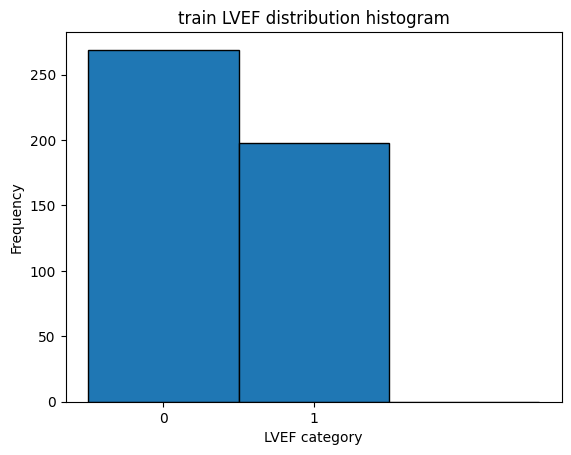

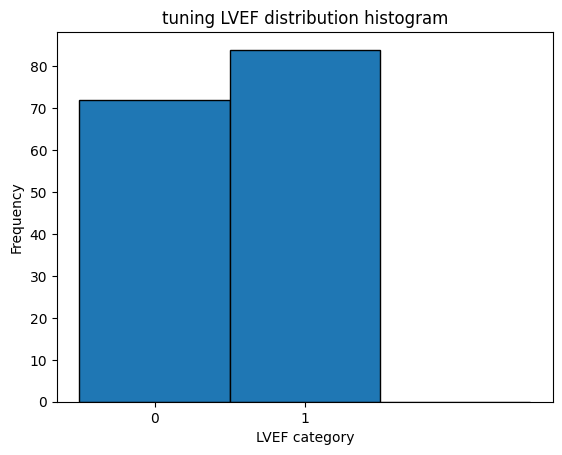

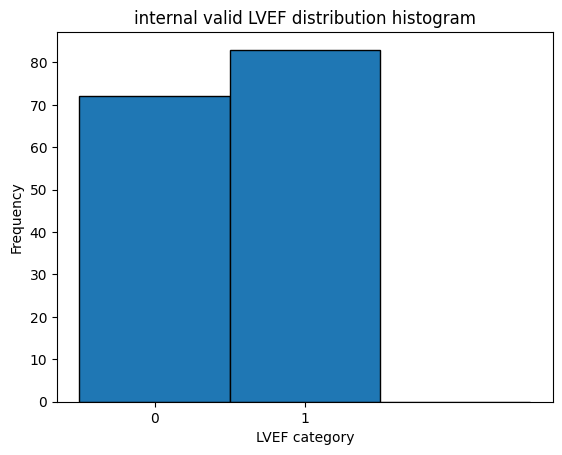

In [17]:
import matplotlib.pyplot as plt

# 히스토그램 분포 시각화 
plt.hist(y_train, bins=[-0.5, 0.5, 1.5, 2.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('LVEF category')
plt.ylabel('Frequency')
plt.title('train LVEF distribution histogram')
plt.show()

# 히스토그램 분포 시각화 
plt.hist(y_tuning, bins=[-0.5, 0.5, 1.5, 2.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('LVEF category')
plt.ylabel('Frequency')
plt.title('tuning LVEF distribution histogram')
plt.show()

# 히스토그램 분포 시각화 
plt.hist(y_internal_validation, bins=[-0.5, 0.5, 1.5, 2.5], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel('LVEF category')
plt.ylabel('Frequency')
plt.title('internal valid LVEF distribution histogram')
plt.show()

In [18]:
X_train = X_train.transpose(0, 2, 1)
X_tuning = X_tuning.transpose(0, 2, 1)
X_internal_validation = X_internal_validation.transpose(0, 2, 1)




In [19]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_tuning = tf.keras.utils.to_categorical(y_tuning, num_classes=2)





In [20]:
import tensorflow as tf

lr = 0.001
optimizer = tf.keras.optimizers.Adam(lr)
loss_fn = tf.keras.losses.CategoricalCrossentropy() 
metrics = [tf.keras.metrics.CategoricalAccuracy()]
epochs = 100
batch_size = 32

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(64, kernel_size=15, input_shape=(X_train.shape[1], X_train.shape[2]), activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(128, kernel_size=15, activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(256, kernel_size=15, activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

# 모델 컴파일
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

# 모델 요약
model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 235, 64)        │        11,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 117, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 103, 128)       │       123,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 51, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 37, 256)        │       491,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 18, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         9,218 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,586 (2.42 MB)

 Trainable params: 635,586 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# 수용 영역 계산 함수
def calculate_receptive_field(layers):
    receptive_field = 1
    stride = 1
    for layer in layers:
        if isinstance(layer, tf.keras.layers.Conv1D):
            kernel_size = layer.kernel_size[0]
            layer_stride = layer.strides[0]
            receptive_field = receptive_field + (kernel_size - 1) * stride
            stride *= layer_stride
        elif isinstance(layer, tf.keras.layers.MaxPooling1D):
            pool_size = layer.pool_size[0]
            pool_stride = layer.strides[0]
            receptive_field = receptive_field + (pool_size - 1) * stride
            stride *= pool_stride
    return receptive_field

# 모델의 수용 영역 계산
receptive_field = calculate_receptive_field(model.layers)
print(f'Receptive field: {receptive_field}')

Receptive field: 106


In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor='val_categorical_accuracy', mode='max')

# 모델 훈련
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(X_tuning, y_tuning), 
                    callbacks=[early_stopping, model_checkpoint])




Epoch 1/100


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - categorical_accuracy: 0.5430 - loss: 1.2121 - val_categorical_accuracy: 0.4615 - val_loss: 0.7067
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - categorical_accuracy: 0.6218 - loss: 0.6572 - val_categorical_accuracy: 0.5321 - val_loss: 0.6935
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - categorical_accuracy: 0.5689 - loss: 0.6682 - val_categorical_accuracy: 0.5064 - val_loss: 0.7024
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - categorical_accuracy: 0.6435 - loss: 0.6428 - val_categorical_accuracy: 0.5064 - val_loss: 0.6947
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - categorical_accuracy: 0.6216 - loss: 0.6397 - val_categorical_accuracy: 0.5321 - val_loss: 0.6934
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - categorical_accuracy: 0.6811 - loss: 0.6096 - val_categorical_accuracy: 0.5321 - val_loss: 0.7312
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - categorical_accuracy: 0.6682 - loss: 0.5936 - 

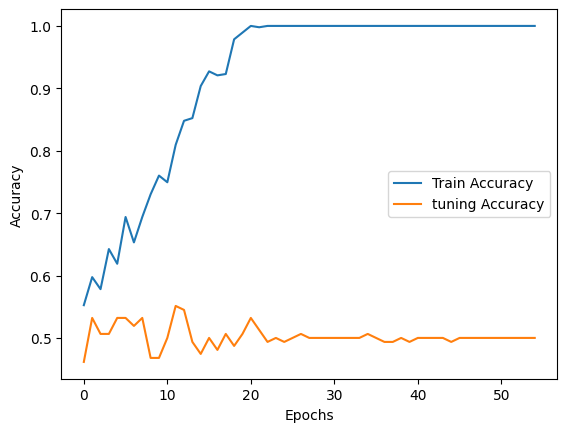

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Accuracy: 0.55


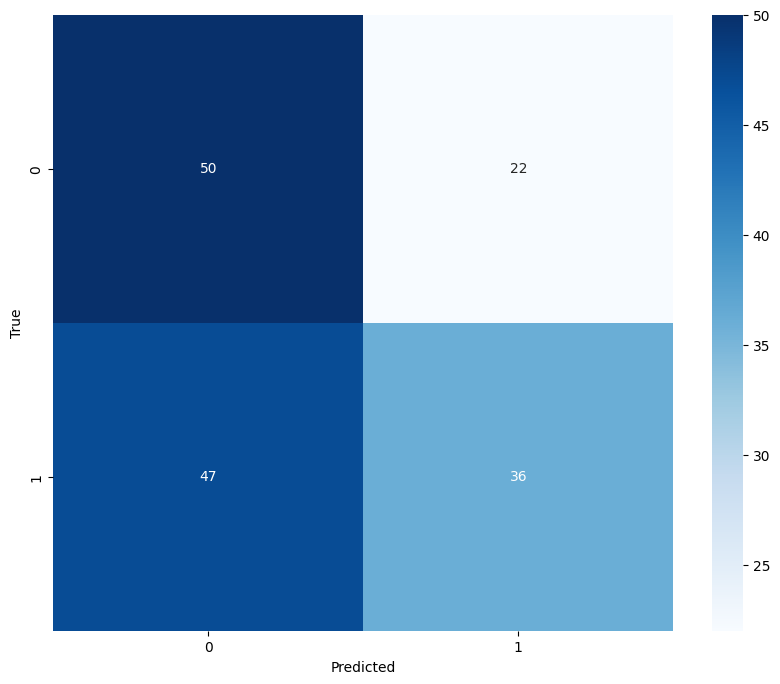

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 가장 성능이 좋은 모델을 불러오기
model = tf.keras.models.load_model("best_model.keras")

# 학습 결과 시각화
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='tuning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 테스트 데이터로 예측 수행 및 정확도 평가
y_pred = model.predict(X_internal_validation)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_internal_validation

accuracy = np.sum(y_pred_classes == y_true) / len(y_true)
print(f'Accuracy: {accuracy:.2f}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
